Figure 3A

By Harshaan Sekhon (sskhon2014@berkeley.edu)

1. The following two datasets were arrived at by first executing the algorithm DeepRNAreg on two GCLiPP datasets: (1) GCLiPP performed upon stimulated Jurkat T Cells and (2) GCLiPP performed upon unstimulated Jurkat T Cells. 

- **stim_overlap_eCLIP_90_90.csv**
- **unstim_overlap_eCLIP_90_90.csv**


2. **Uniprot_cytoplasmic_proteins.csv**



3. **JSL_stim_unstim_exp.csv**: Processed RNA-Seq read counts provided by the following: Felce J: RNA-Seq analysis of early transcriptional responses to activation in the leukaemic Jurkat E6.1 T cell line. 2020b. http://www.doi.org/10.17605/OSF.IO/7X8CG as linked to by Felce et. al (https://wellcomeopenresearch.org/articles/5-42#ref-8) (GSE145453 2x resting and 2x stimulated Jurkat E6.1 cells). Ensembl ID (Release 102) column was then mapped to Entrez Gene ID using the python module pyensembl. pyensembl was installed with the following terminal commands: <code>pip install pyensembl</code> && <code>pyensembl install --release 102 --species human</code>

In [13]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os
from tqdm.notebook import tqdm

In [37]:
rbps = [i.split(".")[0] for i in os.listdir("Resources/ENCORE eCLIP Data")]
if '' in rbps:
    rbps.remove('')

count_data = Table().with_column("geneid", rbps).sort("geneid", descending=False)

stim_tbl = Table().read_table("Resources/stim_overlap_eCLIP_90_90.csv")
unstim_tbl = Table().read_table("Resources/unstim_overlap_eCLIP_90_90.csv")

auc = make_array()
overlap = stim_tbl
RBP = count_data
for name in tqdm(RBP.column("geneid")):
    sum_rbp = np.sum(overlap.with_column("Truth", [name in i for i in overlap.column("RBP")]).where("Truth", True).column("AUC Differential Binding"))
    len_rpb = len(overlap.with_column("Truth", [name in i for i in overlap.column("RBP")]).where("Truth", True).column("AUC Differential Binding"))
    auc = np.append(auc,sum_rbp/len_rpb )
count_data = count_data.with_column("jurkat AUC", auc)#.where(0, are.not_equal_to('nan'))

auc = make_array()
overlap = unstim_tbl
for name in tqdm(RBP.column("geneid")):
    sum_rbp = np.sum(overlap.with_column("Truth", [name in i for i in overlap.column("RBP")]).where("Truth", True).column("AUC Differential Binding"))
    len_rpb = len(overlap.with_column("Truth", [name in i for i in overlap.column("RBP")]).where("Truth", True).column("AUC Differential Binding"))
    auc = np.append(auc,sum_rbp/len_rpb)
count_data = count_data.with_column("k562 AUC", auc)#.where(0, are.not_equal_to('nan'))
count_data 
#count_data = count_data.join("geneid", Table().read_table("JSL_stim/utr_hits.csv"))



super_names = Table().read_table("Resources/Uniprot_cytoplasmic_proteins.csv")

cyto = []
for geneid in tqdm(count_data.column(0)):
    super_short = super_names.with_column("Truth", [geneid in i for i in super_names.column("Gene names")]).where("Truth", True)
    if super_short.num_rows > 0:
        cyto.append(True)
    else:
        cyto.append(False)
count_data = count_data.with_column("cytoplasmic", cyto)

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

/opt/anaconda3/envs/py3forgi/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


  0%|          | 0/86 [00:00<?, ?it/s]

In [38]:
count_data

geneid,jurkat AUC,k562 AUC,cytoplasmic
AARS,39.6536,39.2683,True
AGGF1,38.7205,31.5024,True
AKAP8L,38.2948,41.5318,True
BUD13,36.2479,37.6778,False
CPSF6,40.7729,43.2795,True
CSTF2T,46.3785,42.4349,False
DDX24,33.69,35.5642,False
DDX3X,36.7526,30.6437,True
DDX42,44.648,47.2307,True
DDX55,38.994,41.3729,False


In [40]:
def n(s):
    return (s - np.mean(s))/np.std(s)


exp = Table().read_table("Resources/JSL_stim_unstim_exp.csv")

exp = exp.with_column("resting1", np.nan_to_num((exp.column("resting1"))))
exp = exp.with_column("resting2", np.nan_to_num((exp.column("resting2"))))
exp = exp.with_column("stim1", np.nan_to_num((exp.column("stim1"))))
exp = exp.with_column("stim2", np.nan_to_num((exp.column("stim2"))))





exp = exp.with_column("resting1", exp.column("resting1")/sum(exp.column("resting1")))
exp = exp.with_column("resting2", exp.column("resting2")/sum(exp.column("resting2")))

exp = exp.with_column("stim1", exp.column("stim1")/sum(exp.column("stim1")))
exp = exp.with_column("stim2", exp.column("stim2")/sum(exp.column("stim2")))

exp

Gene,geneid,resting1,resting2,stim1,stim2
ENSG00000223972,DDX11L1,4.60118e-08,0,0,0
ENSG00000227232,WASH7P,9.84653e-06,1.07576e-05,5.58155e-06,6.23309e-06
ENSG00000243485,MIR1302-2HG,0,0,0,0
ENSG00000237613,FAM138A,0,0,0,0
ENSG00000268020,OR4G4P,0,0,0,0
ENSG00000240361,OR4G11P,0,0,0,0
ENSG00000186092,OR4F5,0,0,0,0
ENSG00000238009,AL627309.1,0,0,2.89414e-07,5.06756e-08
ENSG00000239945,AL627309.3,0,0,0,0
ENSG00000233750,CICP27,9.20236e-08,0,0,5.06756e-08


In [41]:

exp = exp
exp = exp.with_column("geneid", [i.upper() for i in exp.column("geneid")])
exp = exp.with_column("resting", (exp.column("resting1") + exp.column("resting2"))/2)
exp = exp.with_column("stim", (exp.column("stim1") + exp.column("stim2"))/2)
exp = exp.where("resting", are.above(0))#.where("stim", are.above(0))
exp = exp.with_column("FC(stimVSresting)", (exp.column("stim")/exp.column("resting")))
#exp = exp.with_column("Log2FC(stimVSresting)", np.log2(exp.column("FC(stimVSresting)")))
combo = count_data.join("geneid", exp)


combo = combo.where("k562 AUC", are.above(0)).where("jurkat AUC", are.above(0))

In [44]:
#combo = combo.where(0, are.not_equal_to("SBDS"))

In [45]:
combo

geneid,jurkat AUC,k562 AUC,cytoplasmic,Gene,resting1,resting2,stim1,stim2,resting,stim,FC(stimVSresting)
AARS,39.6536,39.2683,True,ENSG00000090861,0.000207513,0.000230013,0.000173524,0.000178834,0.000218763,0.000176179,0.805343
AGGF1,38.7205,31.5024,True,ENSG00000164252,6.20239e-05,4.66772e-05,5.82962e-05,4.60641e-05,5.43505e-05,5.21801e-05,0.960067
AKAP8L,38.2948,41.5318,True,ENSG00000011243,6.13338e-05,7.84942e-05,6.71854e-05,5.67566e-05,6.9914e-05,6.1971e-05,0.886389
BUD13,36.2479,37.6778,False,ENSG00000137656,7.003e-05,6.45913e-05,5.78828e-05,5.75168e-05,6.73107e-05,5.76998e-05,0.857216
CPSF6,40.7729,43.2795,True,ENSG00000111605,0.000258034,0.000230149,0.000247035,0.000203513,0.000244092,0.000225274,0.922908
CSTF2T,46.3785,42.4349,False,ENSG00000177613,9.05973e-05,8.50126e-05,8.76924e-05,7.39356e-05,8.78049e-05,8.0814e-05,0.920381
DDX24,33.69,35.5642,False,ENSG00000089737,0.000295212,0.0003029,0.000275315,0.000262347,0.000299056,0.000268831,0.898933
DDX3X,36.7526,30.6437,True,ENSG00000215301,0.000456161,0.000369178,0.000625506,0.000626958,0.00041267,0.000626232,1.51751
DDX42,44.648,47.2307,True,ENSG00000198231,0.000198357,0.000196053,0.000153968,0.000151621,0.000197205,0.000152795,0.774801
DDX55,38.994,41.3729,False,ENSG00000111364,5.97233e-05,7.22949e-05,5.61049e-05,5.52364e-05,6.60091e-05,5.56706e-05,0.843378


In [50]:
combo = combo.where(0, are.not_equal_to("SBDS")).where(0, are.not_equal_to("LIN28B"))

0.367897711788 0.000672875121121


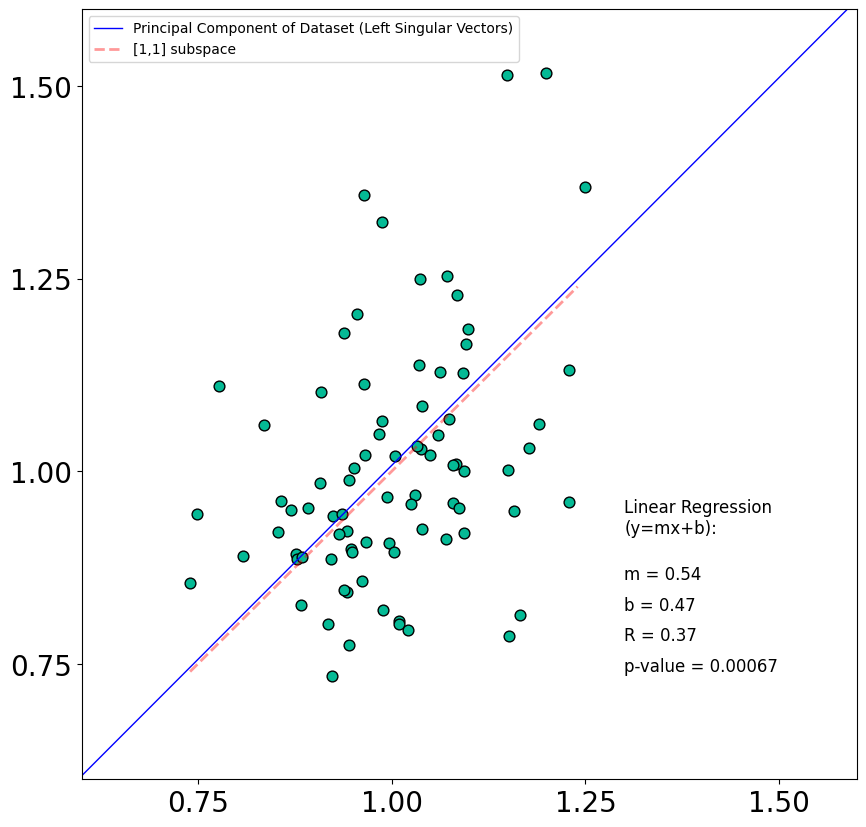

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 
import numpy as np
plt.figure(figsize=(10,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.grid(False)

rng = np.random.RandomState(0)
y = combo.column("FC(stimVSresting)")
x = (combo.column("jurkat AUC"))/(combo.column("k562 AUC"))

data = np.asarray([x,y])
data = data@data.T
eig, eig_v = np.linalg.eig(data)
eig = eig_v[:,1]
eig
#vals = np.arange(min(x), max(x), 0.1)


plt.plot([i*eig[0] for i in np.arange(-3, 3, 1)],[i*eig[1] for i in np.arange(-3, 3, 1)], linewidth=1, linestyle='-',label="Principal Component of Dataset (Left Singular Vectors)", c= "blue")



plt.scatter(x, y, c="#04ba95",s=60, edgecolor='black')
#plt.scatter(x, combo.column("k562 AUC"), alpha=0.8)
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.plot(np.arange(min(x), max(x), 0.1),np.arange(min(x), max(x), 0.1), linewidth=2, linestyle='--',label=r"[1,1] subspace", c= "red", alpha=0.4)

eig_v
#plt.plot([i*eig_v[0] for i in np.arange(min(x)*1.4, max(x)*1.4, 0.1)],[i*eig_v[1] for i in np.arange(min(x)*1.4, max(x)*1.4, 0.1)], linewidth=2, linestyle='-',label="Principal Component of Dataset", c= "blue", alpha=0.4)



c_data = combo#.with_column("sz", sizes).sort("sz", descending=True).take(np.arange(10))#.with_column("truth", [int("IGF2BP" in i) + int("RBM15B" in i) for i in count_data.column("geneid")]).where("truth", are.above(0))

data_tupules = [(i, j) for i,j in zip(x, y)]

for i in np.arange(len(data_tupules)):
    #if c_data.column(0).item(i) in ("RBM4  PABPN1 SF2 RALY SF1 PABPN1 SF2 SRSF1 HNRNPC PTBP1"):
    #plt.annotate(c_data.column("geneid").item(i), data_tupules[i], color='black', alpha = 0.5) ##969aa3
    x=1
print((r_value), p_value)
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)

plt.legend()
plt.text(1.3,0.92,'Linear Regression \n(y=mx+b):' , fontsize=12,color='black')
plt.text(1.3,0.86,'m = ' + str(round(slope,2)), fontsize=12,color='black')
plt.text(1.3,0.82,'b = ' + str(round(intercept,2)), fontsize=12,color='black')
plt.text(1.3,0.78,'R = ' + str(round(r_value,2)), fontsize=12,color='black')
plt.text(1.3,0.74,'p-value = ' + str(round(p_value,5)), fontsize=12,color='black')

plt.savefig("Plot.pdf")

    
# 0.2497453671348317 0.05027466918693247 CYTO True, oRNAment
# 0.0064520761246146495 0.962008429024104 CYTO False, oRNAment


# 0.37361087276232263 0.006922975523875449 CYTO True, eCLIP
# 0.32702318101712574 0.06771151507131415 CYTO False, eCLIP

0.367897711788 0.000672875121121


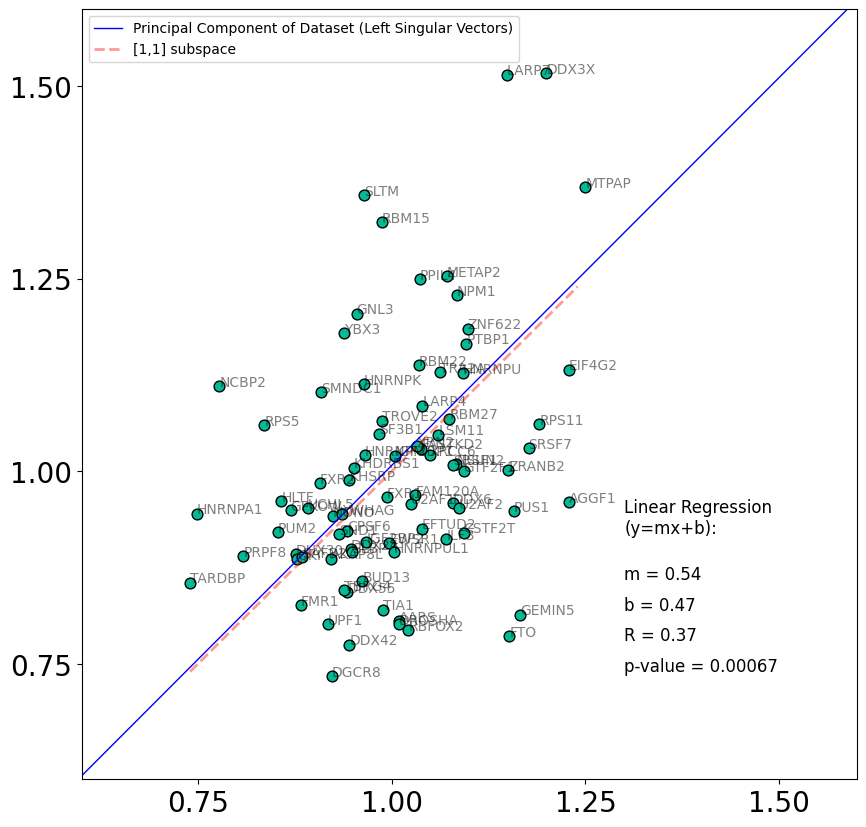

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default') 
import numpy as np
plt.figure(figsize=(10,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.grid(False)

rng = np.random.RandomState(0)
y = combo.column("FC(stimVSresting)")
x = (combo.column("jurkat AUC"))/(combo.column("k562 AUC"))

data = np.asarray([x,y])
data = data@data.T
eig, eig_v = np.linalg.eig(data)
eig = eig_v[:,1]
eig
#vals = np.arange(min(x), max(x), 0.1)


plt.plot([i*eig[0] for i in np.arange(-3, 3, 1)],[i*eig[1] for i in np.arange(-3, 3, 1)], linewidth=1, linestyle='-',label="Principal Component of Dataset (Left Singular Vectors)", c= "blue")



plt.scatter(x, y, c="#04ba95",s=60, edgecolor='black')
#plt.scatter(x, combo.column("k562 AUC"), alpha=0.8)
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

plt.plot(np.arange(min(x), max(x), 0.1),np.arange(min(x), max(x), 0.1), linewidth=2, linestyle='--',label=r"[1,1] subspace", c= "red", alpha=0.4)

eig_v
#plt.plot([i*eig_v[0] for i in np.arange(min(x)*1.4, max(x)*1.4, 0.1)],[i*eig_v[1] for i in np.arange(min(x)*1.4, max(x)*1.4, 0.1)], linewidth=2, linestyle='-',label="Principal Component of Dataset", c= "blue", alpha=0.4)



c_data = combo#.with_column("sz", sizes).sort("sz", descending=True).take(np.arange(10))#.with_column("truth", [int("IGF2BP" in i) + int("RBM15B" in i) for i in count_data.column("geneid")]).where("truth", are.above(0))

data_tupules = [(i, j) for i,j in zip(x, y)]

for i in np.arange(len(data_tupules)):
    #if c_data.column(0).item(i) in ("RBM4  PABPN1 SF2 RALY SF1 PABPN1 SF2 SRSF1 HNRNPC PTBP1"):
    plt.annotate(c_data.column("geneid").item(i), data_tupules[i], color='black', alpha = 0.5) ##969aa3
    x=1
print((r_value), p_value)
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)

plt.legend()
plt.text(1.3,0.92,'Linear Regression \n(y=mx+b):' , fontsize=12,color='black')
plt.text(1.3,0.86,'m = ' + str(round(slope,2)), fontsize=12,color='black')
plt.text(1.3,0.82,'b = ' + str(round(intercept,2)), fontsize=12,color='black')
plt.text(1.3,0.78,'R = ' + str(round(r_value,2)), fontsize=12,color='black')
plt.text(1.3,0.74,'p-value = ' + str(round(p_value,5)), fontsize=12,color='black')

plt.savefig("Plot-labeled.pdf")

    
# 0.2497453671348317 0.05027466918693247 CYTO True, oRNAment
# 0.0064520761246146495 0.962008429024104 CYTO False, oRNAment


# 0.37361087276232263 0.006922975523875449 CYTO True, eCLIP
# 0.32702318101712574 0.06771151507131415 CYTO False, eCLIP

In [52]:
#DATA_SUMMARY = combo.select('geneid','FC(stimVSresting)').relabeled('FC(stimVSresting)','FC Expression (Stim vs. Unstim)').with_column('FC Mean Differential Binding Intensity (Stim vs. Unstim)',(combo.column("jurkat AUC"))/(combo.column("k562 AUC")))
#DATA_SUMMARY.to_csv('foo.csv')

In [53]:
eig_v = np.array([eig_v])
eig_v

array([[[-0.70979306, -0.70441026],
        [ 0.70441026, -0.70979306]]])

In [186]:

project = (eig_v.T)@(eig_v)
proj_X = []
proj_Y = []

for x_i, y_i in zip(x,y):
    projected_point = project @np.array([x_i, y_i])
    proj_X.append(projected_point[0])
    proj_Y.append(projected_point[0])